# Minimalist Overfitting CNN for Binary Classification

<br></br>
### **Introduction**

Binary classification using Tensorflow/Keras is a fundamental aspect of machine learning, aimed at distinguishing between two different categories. A classic example of such an application is the Cats vs Dogs dataset, which involves identifying and differentiating images of cats from those of dogs. In this specific task, the objective is to build a convolutional neural network (CNN) designed to overfit the dataset. Overfitting, typically considered a pitfall in machine learning, is intentionally pursued here to demonstrate the model's capacity to memorize training data rather than generalize from it




<br></br>
### **Dataset Source**

The dataset used in this project was sourced from Kaggle, a popular online community of data scientists and machine learning practitioners.

<br></br>
<h3><b> Loading Python Libraries </b></h3>

In [1]:
# Let's import the required python packages
import os
import keras
import numpy as np
import seaborn as sns
import tensorflow as tf
from keras import layers
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow import data as tf_data
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D


%matplotlib inline
# plt.style.use('seaborn-dark')
plt.style.context('grayscale')

<br></br>
### **Load the data: the Cats vs Dogs dataset**

#### Raw data download

First, let's download the 786M ZIP archive of the raw data:

In [2]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   123M      0  0:00:06  0:00:06 --:--:--  128M


In [3]:
!unzip -q kagglecatsanddogs_5340.zip
!ls

 CDLA-Permissive-2.0.pdf   kagglecatsanddogs_5340.zip   PetImages  'readme[1].txt'   sample_data


<br></br>
Now we have a `PetImages` folder which contain two subfolders, `Cat` and `Dog`. Each
subfolder contains image files for each category.

In [4]:
!ls PetImages

Cat  Dog


<br></br>
### **Filter out corrupted images**

When working with lots of real-world image data, corrupted images are a common
occurence. Let's filter out badly-encoded images that do not feature the string "JFIF"
in their header.

In [5]:
num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print(f"Deleted {num_skipped} images.")

Deleted 1590 images.


<br></br>
### **Dataset Generation - Image Data Generator**

In [6]:
image_size = (180, 180)
batch_size = 128

# Let's load all images without splitting into training or validation sets
all_data_ds = keras.utils.image_dataset_from_directory(
    "PetImages",
    batch_size=batch_size,
    image_size=image_size,
    seed=1337,
)

# Let's display basic information about the dataset
print("Number of batches in the dataset:", len(all_data_ds))

Found 23410 files belonging to 2 classes.
Number of batches in the dataset: 183


<br></br>
### **Data Visualization**

`Here are the first 9 images in the training dataset.`

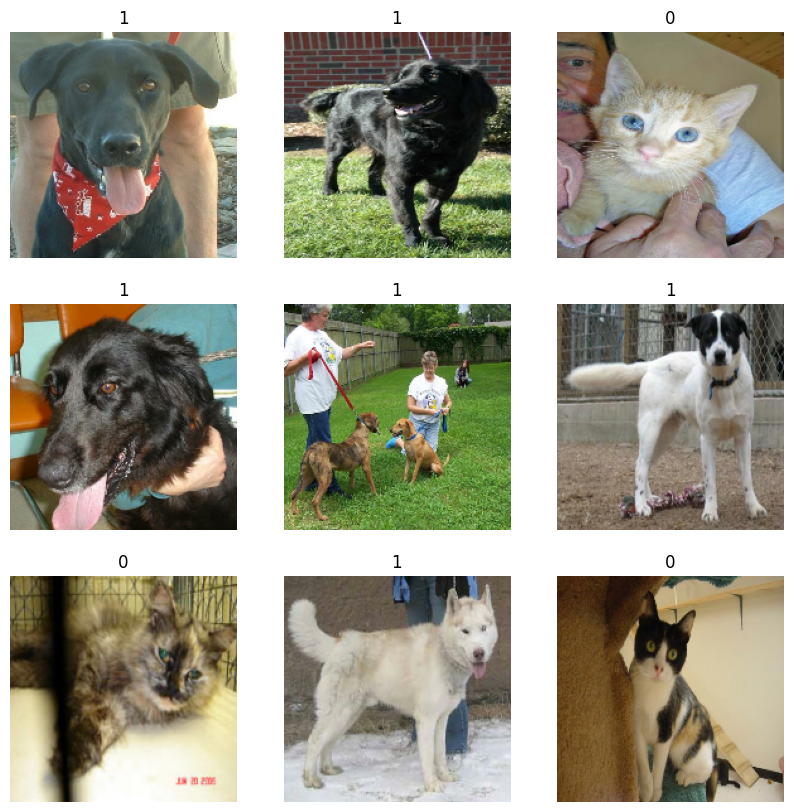

In [7]:
# Let's set the figure size to 10x10 inches for displaying images.
plt.figure(figsize=(10, 10))

# Let's loop through one batch of images and labels from the training dataset.
for images, labels in all_data_ds.take(1):
    for i in range(9):  # Iterates over the first nine images and labels in the batch.
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

<br></br>
### **Configure the dataset for performance**

In [8]:
# Prefetching samples in GPU memory helps maximize GPU utilization.
all_data_ds = all_data_ds.prefetch(tf_data.AUTOTUNE)

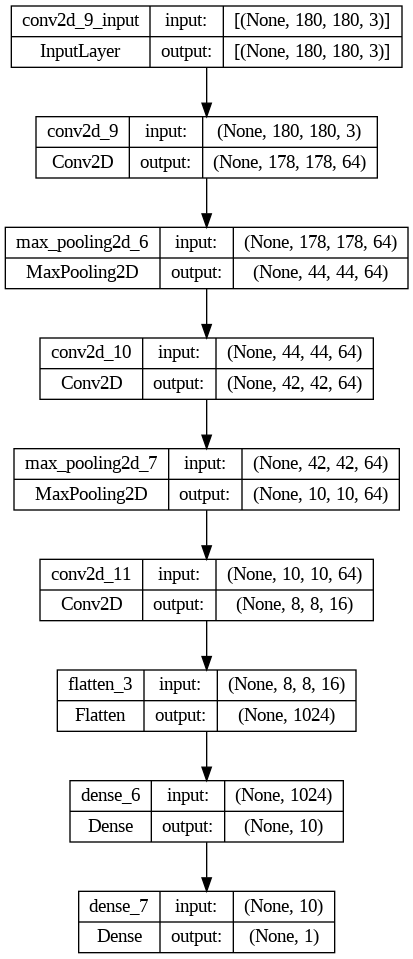

<br></br>
### **Model Building**

<br></br>
### **Model Evaluation(Precison, Recall, F1-score)**

---------

<br></br>
### **Model Building**

In [57]:
# Let's initialize the model to be sequential
model = Sequential()

# Let's add a 2D convolution layer with 64 filters, a 3x3 kernel, and ReLU activation, specifying input shape as the first image's shape
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=all_data_ds.element_spec[0].shape[1:]))
# Let's add a max pooling layer to reduce spatial dimensions by quarter
model.add(layers.MaxPool2D(4, 4))

# Let's flatten the output of the last convolution layer to feed into a dense layer
model.add(layers.Flatten())

# Let's add the output dense layer with 1 units for 1 classes, using sigmoid activation
model.add(layers.Dense(1, activation=None))

<br></br>
### **Model Summary**

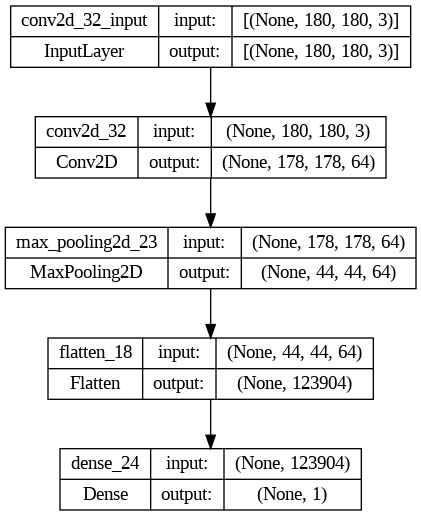

In [58]:
keras.utils.plot_model(model, show_shapes=True)

<br></br>

In [38]:
# Let's set the number of epochs, which defines how many times the model will see the entire dataset
epochs = 100

# Let's compile the model to prepare it for training
model.compile(
    optimizer=tf.keras.optimizers.Adam(3e-4),  # Use Adam optimizer with a learning rate of 0.0003
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),  # Set the loss function for binary classification
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name="accuracy"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall")
    ]
)

# Let's fit the model using the entire dataset without using separate validation data
history = model.fit(
    all_data_ds,
    epochs=epochs
)

Epoch 1/100
183/183 [==============================] - 9s 43ms/step - loss: 12.9211 - accuracy: 0.5960 - precision: 0.5952 - recall: 0.5926
Epoch 2/100
183/183 [==============================] - 8s 42ms/step - loss: 2.0546 - accuracy: 0.6851 - precision: 0.6909 - recall: 0.6665
Epoch 3/100
183/183 [==============================] - 8s 43ms/step - loss: 0.9080 - accuracy: 0.7488 - precision: 0.7624 - recall: 0.7207
Epoch 4/100
183/183 [==============================] - 8s 43ms/step - loss: 0.5867 - accuracy: 0.7973 - precision: 0.8182 - recall: 0.7629
Epoch 5/100
183/183 [==============================] - 8s 41ms/step - loss: 0.4592 - accuracy: 0.8294 - precision: 0.8515 - recall: 0.7967
Epoch 6/100
183/183 [==============================] - 9s 45ms/step - loss: 0.3334 - accuracy: 0.8645 - precision: 0.8907 - recall: 0.8301
Epoch 7/100
183/183 [==============================] - 8s 43ms/step - loss: 0.2445 - accuracy: 0.8983 - precision: 0.9234 - recall: 0.8680
Epoch 8/100
183/183 [=====

<br></br>
### **Model Evaluation(Precison, Recall, F1-score)**

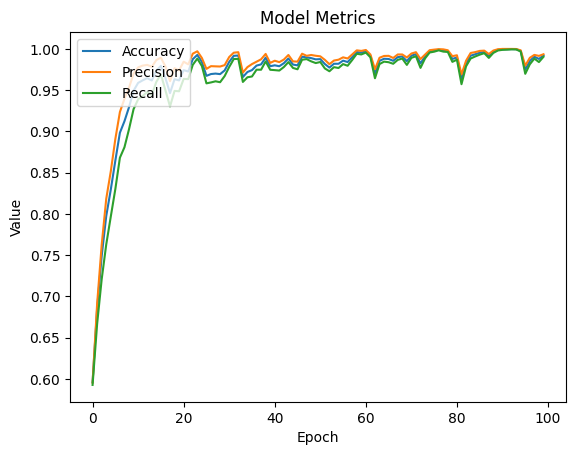

In [48]:
# Plotting the accuracy of the model for each training epoch
plt.plot(history.history['accuracy'], label='Accuracy')

# Plotting the precision of the model for each training epoch
plt.plot(history.history['precision'], label='Precision')

# Plotting the recall of the model for each training epoch
plt.plot(history.history['recall'], label='Recall')

plt.title('Model Metrics')
plt.ylabel('Value')
plt.xlabel('Epoch')

# Let's add a legend to the plot to identify each line
plt.legend(loc="upper left")
plt.show()

<br></br>
### **Model Inference**

1/1 [==============================] - 0s 178ms/step
This image is 87.33% cat and 12.67% dog.


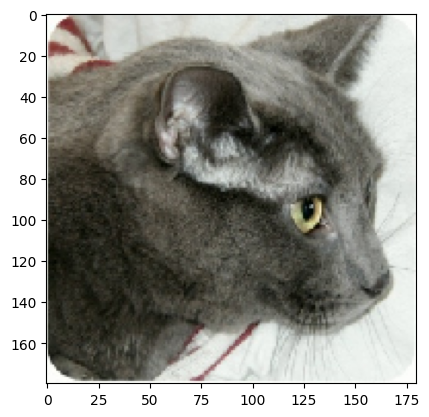

In [23]:
img = keras.utils.load_img("PetImages/Cat/6779.jpg", target_size=image_size)
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(tf.sigmoid(predictions[0][0]))
print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")

<br></br>
### **Decreasing the number of filters**

In [46]:
# Let's initialize the model to be sequential
model_decrease_filter = Sequential()

# Let's add a 2D convolution layer with 64 filters, a 3x3 kernel, and ReLU activation, specifying input shape as the first image's shape
model_decrease_filter.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=all_data_ds.element_spec[0].shape[1:]))
# Let's add a max pooling layer to reduce spatial dimensions by quarter
model_decrease_filter.add(layers.MaxPool2D(4, 4))

# Let's flatten the output of the last convolution layer to feed into a dense layer
model_decrease_filter.add(layers.Flatten())

# Let's add the output dense layer with 1 units for 1 classes, using sigmoid activation
model_decrease_filter.add(layers.Dense(1, activation=None))

<br></br>
### **Model Building**

In [47]:
# Let's set the number of epochs, which defines how many times the model will see the entire dataset
epochs = 100

# Let's compile the model to prepare it for training
model_decrease_filter.compile(
    optimizer=tf.keras.optimizers.Adam(3e-4),  # Use Adam optimizer with a learning rate of 0.0003
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),  # Set the loss function for binary classification
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name="accuracy"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall")
    ]
)

# Let's fit the model using the entire dataset without using separate validation data
history_decrease_filter = model_decrease_filter.fit(
    all_data_ds,
    epochs=epochs
)

Epoch 1/100
183/183 [==============================] - 9s 41ms/step - loss: 16.1383 - accuracy: 0.5398 - precision: 0.5382 - recall: 0.5403
Epoch 2/100
183/183 [==============================] - 8s 40ms/step - loss: 5.9554 - accuracy: 0.5607 - precision: 0.5597 - recall: 0.5557
Epoch 3/100
183/183 [==============================] - 8s 41ms/step - loss: 3.6663 - accuracy: 0.5748 - precision: 0.5748 - recall: 0.5646
Epoch 4/100
183/183 [==============================] - 8s 42ms/step - loss: 2.9101 - accuracy: 0.5845 - precision: 0.5857 - recall: 0.5687
Epoch 5/100
183/183 [==============================] - 8s 43ms/step - loss: 2.4337 - accuracy: 0.5918 - precision: 0.5929 - recall: 0.5779
Epoch 6/100
183/183 [==============================] - 7s 38ms/step - loss: 1.4845 - accuracy: 0.5925 - precision: 0.5957 - recall: 0.5680
Epoch 7/100
183/183 [==============================] - 9s 45ms/step - loss: 0.9748 - accuracy: 0.5930 - precision: 0.6140 - recall: 0.4938
Epoch 8/100
183/183 [=====

<br></br>
### **Model Evaluation(Precison, Recall, F1-score)**

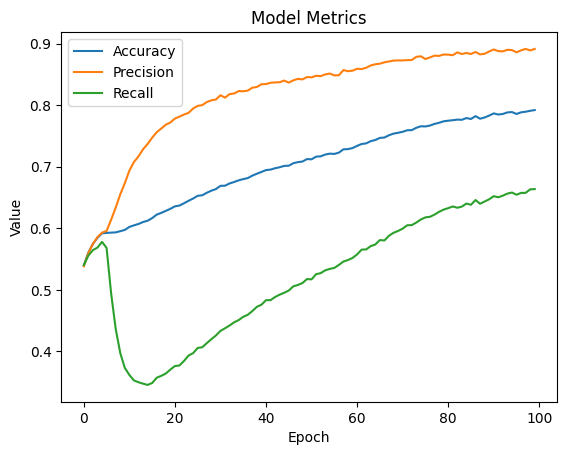

In [49]:
# Plotting the accuracy of the model for each training epoch
plt.plot(history_decrease_filter.history['accuracy'], label='Accuracy')

# Plotting the precision of the model for each training epoch
plt.plot(history_decrease_filter.history['precision'], label='Precision')

# Plotting the recall of the model for each training epoch
plt.plot(history_decrease_filter.history['recall'], label='Recall')

plt.title('Model Metrics')
plt.ylabel('Value')
plt.xlabel('Epoch')

# Let's add a legend to the plot to identify each line
plt.legend(loc="upper left")
plt.show()

<br></br>
- Decreasing the number of filters in the first convolutional layer from 64 to 4 did not lead to overfitting. Throughout the initial half of the training epochs, the accuracy fluctuated between 0.5 and 0.6. By the end of the training process, after 100 epochs, the model achieved a final accuracy of 0.7920, with a precision of 0.8913 and a recall of 0.6636.

- Reducing the filter count compared to the base configuration did not enhance the model's performance or induce overfitting; thus, the overall performance was inferior to that of the base configuration. This outcome indicates that a higher number of filters might be necessary to capture more complex features in the data, which in turn could improve model accuracy and general effectiveness.

<br></br>
### **Decreasing the number of layers**

In [54]:
# Let's initialize the model to be sequential
model_decrease_layer = Sequential()

# Let's add a 2D convolution layer with 64 filters, a 3x3 kernel, and ReLU activation, specifying input shape as the first image's shape
model_decrease_layer.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=all_data_ds.element_spec[0].shape[1:]))

# Let's flatten the output of the last convolution layer to feed into a dense layer
model_decrease_layer.add(layers.Flatten())

# Let's add the output dense layer with 1 units for 1 classes, using sigmoid activation
model_decrease_layer.add(layers.Dense(1, activation=None))

<br></br>
### **Model Building**

In [55]:
# Let's set the number of epochs, which defines how many times the model will see the entire dataset
epochs = 100

# Let's compile the model to prepare it for training
model_decrease_layer.compile(
    optimizer=tf.keras.optimizers.Adam(3e-4),  # Use Adam optimizer with a learning rate of 0.0003
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),  # Set the loss function for binary classification
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name="accuracy"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall")
    ]
)

# Let's fit the model using the entire dataset without using separate validation data
history_decrease_layer = model_decrease_layer.fit(
    all_data_ds,
    epochs=epochs
)

Epoch 1/100
183/183 [==============================] - 9s 40ms/step - loss: 75.5238 - accuracy: 0.5185 - precision: 0.5171 - recall: 0.5156
Epoch 2/100
183/183 [==============================] - 8s 41ms/step - loss: 19.4571 - accuracy: 0.5195 - precision: 0.5181 - recall: 0.5169
Epoch 3/100
183/183 [==============================] - 8s 41ms/step - loss: 10.6648 - accuracy: 0.5240 - precision: 0.5228 - recall: 0.5160
Epoch 4/100
183/183 [==============================] - 8s 40ms/step - loss: 7.1855 - accuracy: 0.5246 - precision: 0.5233 - recall: 0.5191
Epoch 5/100
183/183 [==============================] - 8s 41ms/step - loss: 3.8145 - accuracy: 0.5195 - precision: 0.5179 - recall: 0.5210
Epoch 6/100
183/183 [==============================] - 8s 42ms/step - loss: 1.9004 - accuracy: 0.5271 - precision: 0.5276 - recall: 0.4901
Epoch 7/100
183/183 [==============================] - 9s 49ms/step - loss: 1.3568 - accuracy: 0.5288 - precision: 0.5336 - recall: 0.4353
Epoch 8/100
183/183 [===

<br></br>
### **Model Evaluation(Precison, Recall, F1-score)**

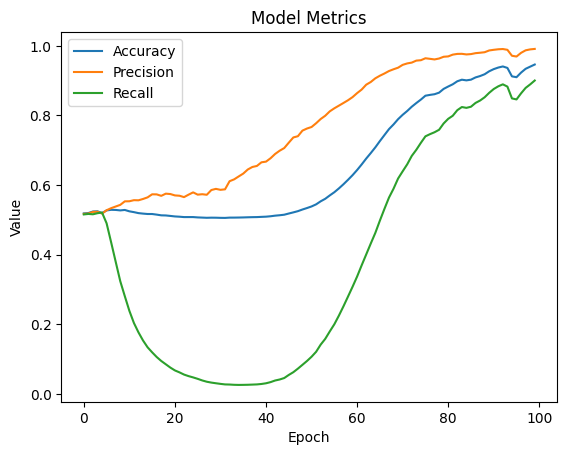

In [56]:
# Plotting the accuracy of the model for each training epoch
plt.plot(history_decrease_layer.history['accuracy'], label='Accuracy')

# Plotting the precision of the model for each training epoch
plt.plot(history_decrease_layer.history['precision'], label='Precision')

# Plotting the recall of the model for each training epoch
plt.plot(history_decrease_layer.history['recall'], label='Recall')

plt.title('Model Metrics')
plt.ylabel('Value')
plt.xlabel('Epoch')

# Let's add a legend to the plot to identify each line
plt.legend(loc="upper left")
plt.show()

<br></br>
- Decreasing the number of layers from one convolution layer and one MaxPooling layer to just one 2D convolution layer did not lead to overfitting. Throughout sixty percent of the training epochs, the accuracy fluctuated between 0.5 and 0.52. By the end of the training process, after 100 epochs, the model achieved a final accuracy of 0.94, with a precision of 0.99 and a recall of 0.90.

- Reducing the layers compared to the base configuration did not enhance the model's performance or induce overfitting; thus, the overall performance was inferior to that of the base configuration. This outcome indicates that a higher number of layers/filters might be necessary to capture more complex features in the data, which in turn could improve model accuracy and general effectiveness.

<br></br>
### **Increasing the number of filters**

In [56]:
# Let's initialize the model to be sequential
model_increase_filter = Sequential()

# Let's add a 2D convolution layer with 64 filters, a 3x3 kernel, and ReLU activation, specifying input shape as the first image's shape
model_increase_filter.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=all_data_ds.element_spec[0].shape[1:]))
# Let's add a max pooling layer to reduce spatial dimensions by quarter
model_increase_filter.add(layers.MaxPool2D(4, 4))

# Let's flatten the output of the last convolution layer to feed into a dense layer
model_increase_filter.add(layers.Flatten())

# Let's add the output dense layer with 1 units for 1 classes, using sigmoid activation
model_increase_filter.add(layers.Dense(1, activation=None))

In [21]:
# Let's set the number of epochs, which defines how many times the model will see the entire dataset
epochs = 100

# Let's compile the model to prepare it for training
model_increase_filter.compile(
    optimizer=tf.keras.optimizers.Adam(3e-4),  # Use Adam optimizer with a learning rate of 0.0003
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),  # Set the loss function for binary classification
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name="accuracy"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall")
    ]
)

# Let's fit the model using the entire dataset without using separate validation data
history_increase_filter = model_increase_filter.fit(
    all_data_ds,
    epochs=epochs
)

Epoch 1/100
183/183 [==============================] - 10s 45ms/step - loss: 0.6701 - accuracy: 0.5715 - precision: 0.7138 - recall: 0.2342
Epoch 2/100
183/183 [==============================] - 8s 45ms/step - loss: 0.6190 - accuracy: 0.6447 - precision: 0.7507 - recall: 0.4300
Epoch 3/100
183/183 [==============================] - 8s 44ms/step - loss: 0.5237 - accuracy: 0.7330 - precision: 0.7840 - recall: 0.6408
Epoch 4/100
183/183 [==============================] - 8s 44ms/step - loss: 0.4624 - accuracy: 0.7747 - precision: 0.8264 - recall: 0.6937
Epoch 5/100
183/183 [==============================] - 8s 45ms/step - loss: 0.4250 - accuracy: 0.7967 - precision: 0.8488 - recall: 0.7204
Epoch 6/100
183/183 [==============================] - 8s 45ms/step - loss: 0.3911 - accuracy: 0.8175 - precision: 0.8644 - recall: 0.7518
Epoch 7/100
183/183 [==============================] - 8s 44ms/step - loss: 0.3621 - accuracy: 0.8330 - precision: 0.8766 - recall: 0.7739
Epoch 8/100
183/183 [=====

<br></br>
### **Model Evaluation(Precison, Recall, F1-score)**

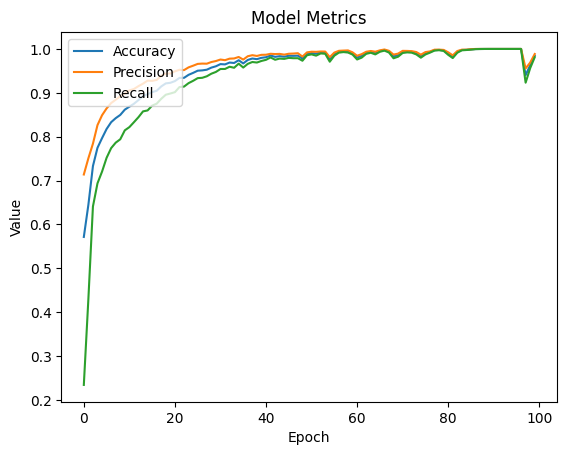

In [22]:
# Plotting the accuracy of the model for each training epoch
plt.plot(history.history['accuracy'], label='Accuracy')

# Plotting the precision of the model for each training epoch
plt.plot(history.history['precision'], label='Precision')

# Plotting the recall of the model for each training epoch
plt.plot(history.history['recall'], label='Recall')

plt.title('Model Metrics')
plt.ylabel('Value')
plt.xlabel('Epoch')

# Let's add a legend to the plot to identify each line
plt.legend(loc="upper left")
plt.show()

<br></br>
- Increasing the number of filters in first convolution layer to 128 led to overfitting. By fifty epochs, the model had achieved overfitting. By the end of the training process, after 100 epochs, the model achieved a final accuracy of 0.98, with a precision of 0.98 and a recall of 0.98.

- Increasing the filters compared to the base configuration enhanced the model's performance and induced overfitting; thus, the overall performance was superior to that of the base configuration. This outcome indicates that a higher number of layers/filters might be necessary to capture more complex features in the data, which in turn could improve model accuracy and general effectiveness.

<br></br>
### **Increasing the number of layers**

In [56]:
# Let's initialize the model to be sequential
model_increase_layer = Sequential()

# Let's add a 2D convolution layer with 64 filters, a 3x3 kernel, and ReLU activation, specifying input shape as the first image's shape
model_increase_layer.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=all_data_ds.element_spec[0].shape[1:]))
# Let's add a max pooling layer to reduce spatial dimensions by quarter
model_increase_layer.add(layers.MaxPool2D(4, 4))

# Let's add another 2D convolution layer with 32 filters and a 3x3 kernel
model_increase_layer.add(layers.Conv2D(64, (3, 3), activation='relu'))
# # Let's add another max pooling layer to further reduce spatial dimensions
model_increase_layer.add(layers.MaxPool2D(4, 4))

# Let's flatten the output of the last convolution layer to feed into a dense layer
model_increase_layer.add(layers.Flatten())

# Let's add the output dense layer with 1 units for 1 classes, using sigmoid activation
model_increase_layer.add(layers.Dense(1, activation=None))

In [34]:
# Let's set the number of epochs, which defines how many times the model will see the entire dataset
epochs = 100

# Let's compile the model to prepare it for training
model_increase_layer.compile(
    optimizer=tf.keras.optimizers.Adam(3e-4),  # Use Adam optimizer with a learning rate of 0.0003
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),  # Set the loss function for binary classification
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name="accuracy"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall")
    ]
)

# Let's fit the model using the entire dataset without using separate validation data
history_increase_layer = model_increase_layer.fit(
    all_data_ds,
    epochs=epochs
)

Epoch 1/100
183/183 [==============================] - 10s 44ms/step - loss: 1.8883 - accuracy: 0.6000 - precision: 0.6073 - recall: 0.5588
Epoch 2/100
183/183 [==============================] - 8s 45ms/step - loss: 0.7547 - accuracy: 0.6848 - precision: 0.7113 - recall: 0.6190
Epoch 3/100
183/183 [==============================] - 8s 44ms/step - loss: 0.6011 - accuracy: 0.7221 - precision: 0.7627 - recall: 0.6425
Epoch 4/100
183/183 [==============================] - 8s 44ms/step - loss: 0.5260 - accuracy: 0.7491 - precision: 0.7969 - recall: 0.6665
Epoch 5/100
183/183 [==============================] - 8s 44ms/step - loss: 0.4856 - accuracy: 0.7665 - precision: 0.8162 - recall: 0.6861
Epoch 6/100
183/183 [==============================] - 8s 43ms/step - loss: 0.4403 - accuracy: 0.7922 - precision: 0.8435 - recall: 0.7159
Epoch 7/100
183/183 [==============================] - 8s 44ms/step - loss: 0.4164 - accuracy: 0.8055 - precision: 0.8562 - recall: 0.7328
Epoch 8/100
183/183 [=====

<br></br>
### **Model Evaluation(Precison, Recall, F1-score)**

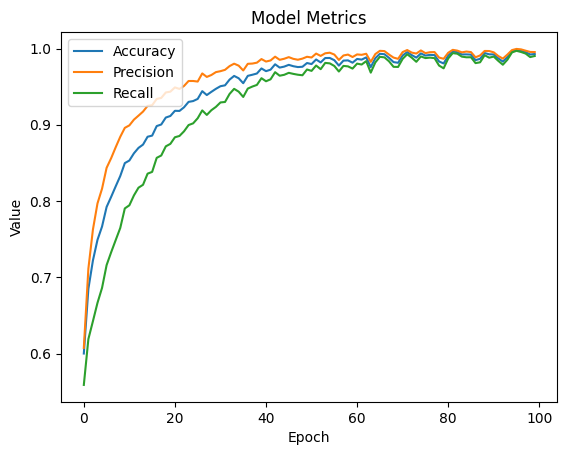

In [35]:
# Plotting the accuracy of the model for each training epoch
plt.plot(history_increase_layer.history['accuracy'], label='Accuracy')

# Plotting the precision of the model for each training epoch
plt.plot(history_increase_layer.history['precision'], label='Precision')

# Plotting the recall of the model for each training epoch
plt.plot(history_increase_layer.history['recall'], label='Recall')

plt.title('Model Metrics')
plt.ylabel('Value')
plt.xlabel('Epoch')

# Let's add a legend to the plot to identify each line
plt.legend(loc="upper left")
plt.show()

<br></br>
- Increasing the number of layers from one convolution layer and one MaxPooling layer to two 2D convolution layers and two MaxPooling layers led to overfitting. By fifty epochs, the model had achieved overfitting. By the end of the training process, after 100 epochs, the model achieved a final accuracy of 0.99, with a precision of 0.99 and a recall of 0.99.

- Increasing the layers compared to the base configuration enhanced the model's performance and induced overfitting; thus, the overall performance was superior to that of the base configuration. This outcome indicates that a higher number of layers/filters might be necessary to capture more complex features in the data, which in turn could improve model accuracy and general effectiveness.